# Data-Driven Study on Student Scores and Demographics

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Students_Performance.csv")

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,Unnamed: 10,Unnamed: 11
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.667,NaN,NaN
1,0,group C,some college,1,1,69,90,88,247,82.333,NaN,Which group has the highest average total score?
2,0,group B,master's degree,1,0,90,95,93,278,92.667,NaN,NaN
3,1,group A,associate's degree,0,0,47,57,44,148,49.333,NaN,NaN
4,1,group C,some college,1,0,76,78,75,229,76.333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000,NaN,NaN
996,1,group C,high school,0,0,62,55,55,172,57.333,NaN,NaN
997,0,group C,high school,0,1,59,71,65,195,65.000,NaN,NaN
998,0,group D,some college,1,1,68,78,77,223,74.333,NaN,NaN


In [9]:
#question-1.What is the average math score of all students?
average_math_score = df['math_score'].mean()
print("The average math score is:", average_math_score)


The average math score is: 66.089


In [10]:
#question-2. How many students scored above 90 in the reading test?
above_90_reading = df[df['reading_score'] > 90].shape[0]
print("Number of students who scored above 90 in the reading test:", above_90_reading)

Number of students who scored above 90 in the reading test: 62


In [17]:
#question-3. What is the average total score for male and female students separately?
df['total_score'] =df['math_score']+df['reading_score']

average_total_score_male=df[df['gender']=='male']['total_score'].mean()
average_total_score_female=df[df['gender']=='female']['total_score'].mean()

print("Average total score for male students:", average_total_score_male)
print("Average total score for female students:", average_total_score_female)

Average total score for male students: nan
Average total score for female students: nan


In [20]:
#question-4. Find the highest writing score and the associated student group.
highest_writing_row =df.loc[df['writing_score'].idxmax()]
highest_writing_score = highest_writing_row['writing_score']
associated_group = highest_writing_row['race_ethnicity']
print("The highest writing score is:", highest_writing_score)
print("The associated student group is:", associated_group)

The highest writing score is: 100
The associated student group is: group D


In [21]:
#question-5.Calculate the proportion of students who completed the test preparation course.
test_preparation_completed = df['test_preparation_course'].sum()
total_students = df.shape[0]
proportion_completed = test_preparation_completed / total_students
print(f"Proportion of students who completed the test preparation course: {proportion_completed:.2f}")



Proportion of students who completed the test preparation course: 0.36


In [22]:
#question-6.Determine the distribution of parental education levels.
parental_education_distribution = df['parental_level_of_education'].value_counts()
print("Distribution of parental education levels:")
print(parental_education_distribution)


Distribution of parental education levels:
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [23]:
#question7. What is the average score for students with different lunch types?
average_scores_by_lunch = df.groupby('lunch')['average_score'].mean()
print(average_scores_by_lunch)

lunch
0    62.199054
1    70.837200
Name: average_score, dtype: float64


In [24]:
#question-8. Find the correlation between math, reading, and writing scores.
correlation_matrix = df[['math_score', 'reading_score', 'writing_score']].corr()
print("Correlation between math, reading, and writing scores:")
print(correlation_matrix)

Correlation between math, reading, and writing scores:
               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


In [25]:
#question-9. Which group has the highest average total score?
group_avg_total_score = df.groupby('gender')['total_score'].mean()
highest_avg_group = group_avg_total_score.idxmax()
print(f"Group with the highest average total score: {highest_avg_group}")

Group with the highest average total score: 0


In [26]:
#question-10. Count the number of students whose average score is below 50.
students_below_50 = df[df['average_score'] < 50].shape[0]
print(f"Number of students with average score below 50: {students_below_50}")

Number of students with average score below 50: 103


In [27]:
#question-11. List the top 5 students by average score.
top_5_students = df[['gender', 'average_score']].sort_values(by='average_score', ascending=False).head(5)
print("Top 5 students by average score:")
print(top_5_students)

Top 5 students by average score:
     gender  average_score
916       1        100.000
458       0        100.000
962       0        100.000
114       0         99.667
179       0         99.000


In [28]:
#question-12. What is the average score by race/ethnicity?
average_score_by_race = df.groupby('race_ethnicity')['average_score'].mean()
print("Average score by race/ethnicity:")
print(average_score_by_race)

Average score by race/ethnicity:
race_ethnicity
group A    62.992472
group B    65.468437
group C    67.131652
group D    69.179389
group E    72.752343
Name: average_score, dtype: float64


In [29]:
#question-13. Number of students who scored below 60 in at least one subject
students_below_60 = df[(df['math_score'] < 60) | (df['reading_score'] < 60) | (df['writing_score'] < 60)].shape[0]
print(f"Number of students who scored below 60 in at least one subject: {students_below_60}")

Number of students who scored below 60 in at least one subject: 397


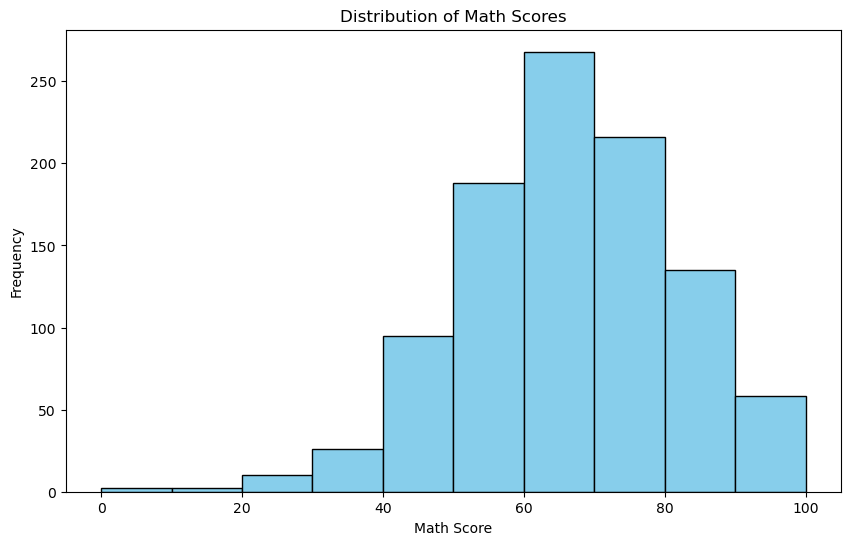

In [30]:
#question-14. Create a histogram of math scores
plt.figure(figsize=(10, 6))
plt.hist(df['math_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

In [31]:
#question-15. Distribution of students by gender
gender_distribution = df['gender'].value_counts()
print("Distribution of students by gender:")
print(gender_distribution)

Distribution of students by gender:
gender
0    518
1    482
Name: count, dtype: int64


In [32]:
#question-16. Average math score for students who completed the test preparation course vs. those who didn't
avg_math_score_by_test_prep = df.groupby('test_preparation_course')['math_score'].mean()
print("Average math score by test preparation course completion:")
print(avg_math_score_by_test_prep)

Average math score by test preparation course completion:
test_preparation_course
0    64.077882
1    69.695531
Name: math_score, dtype: float64


In [33]:
#question-17. Number of students with a total score above 250
students_above_250 = df[df['total_score'] > 250].shape[0]
print(f"Number of students with a total score above 250: {students_above_250}")

Number of students with a total score above 250: 0


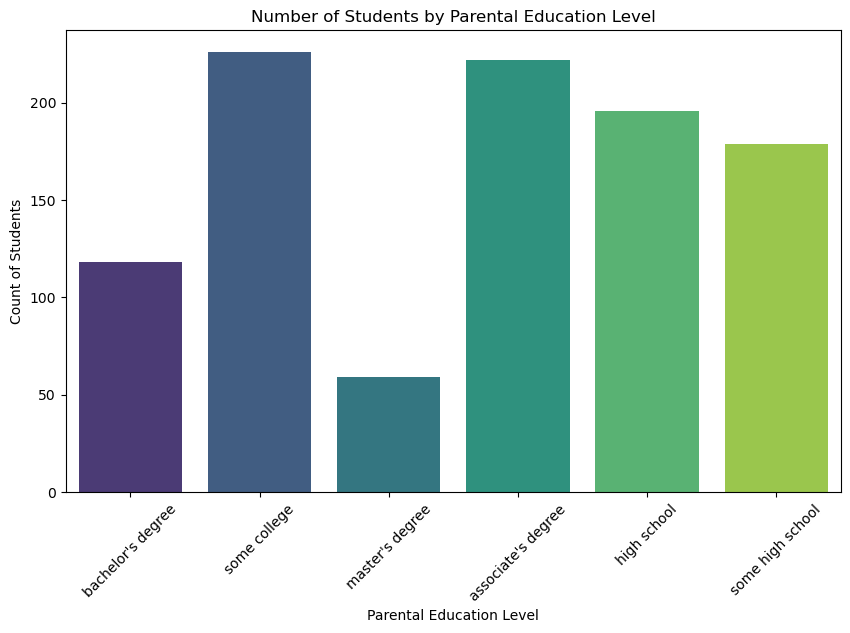

In [34]:
#question-18. Bar plot showing the number of students in each parental education level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental_level_of_education', palette='viridis')
plt.title('Number of Students by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Count of Students')
plt.xticks(rotation=45)
plt.show()

In [35]:
#question-19. Calculate the median writing score
median_writing_score = df['writing_score'].median()
print(f"Median writing score: {median_writing_score}")

Median writing score: 69.0


In [36]:
#question-20. Compare the average total score for different race/ethnicity groups
average_total_score_by_race = df.groupby('race_ethnicity')['total_score'].mean()
print("Average total score by race/ethnicity:")
print(average_total_score_by_race)

Average total score by race/ethnicity:
race_ethnicity
group A    126.303371
group B    130.805263
group C    133.567398
group D    137.393130
group E    146.850000
Name: total_score, dtype: float64


In [37]:
#question-21.Percentage of students who scored above 80 in math
percentage_above_80_math = (df[df['math_score'] > 80].shape[0] / df.shape[0]) * 100
print(f"Percentage of students who scored above 80 in math: {percentage_above_80_math}%")

Percentage of students who scored above 80 in math: 17.599999999999998%


In [38]:
#question-22. Highest total score among all students
highest_total_score = df['total_score'].max()
print(f"Highest total score: {highest_total_score}")

Highest total score: 200


In [39]:
#question-23. Student(s) with the lowest average score
lowest_avg_score_students = df[df['average_score'] == df['average_score'].min()]
print("Student(s) with the lowest average score:")
print(lowest_avg_score_students)

Student(s) with the lowest average score:
    gender race_ethnicity parental_level_of_education  lunch  \
59       0        group C            some high school      0   

    test_preparation_course  math_score  reading_score  writing_score  \
59                        0           0             17             10   

    total_score  average_score  Unnamed: 10 Unnamed: 11  
59           17            9.0          NaN         NaN  


In [40]:
#question-24. Standard deviation of the math scores
std_dev_math_score = df['math_score'].std()
print(f"Standard deviation of math scores: {std_dev_math_score}")

Standard deviation of math scores: 15.163080096009468


In [41]:
#question-25. Mean and median of reading scores
mean_reading_score = df['reading_score'].mean()
median_reading_score = df['reading_score'].median()
print(f"Mean of reading scores: {mean_reading_score}")
print(f"Median of reading scores: {median_reading_score}")

Mean of reading scores: 69.169
Median of reading scores: 70.0


In [42]:
#question-26 Range of the writing scores
writing_score_range = df['writing_score'].max() - df['writing_score'].min()
print(f"Range of writing scores: {writing_score_range}")

Range of writing scores: 90


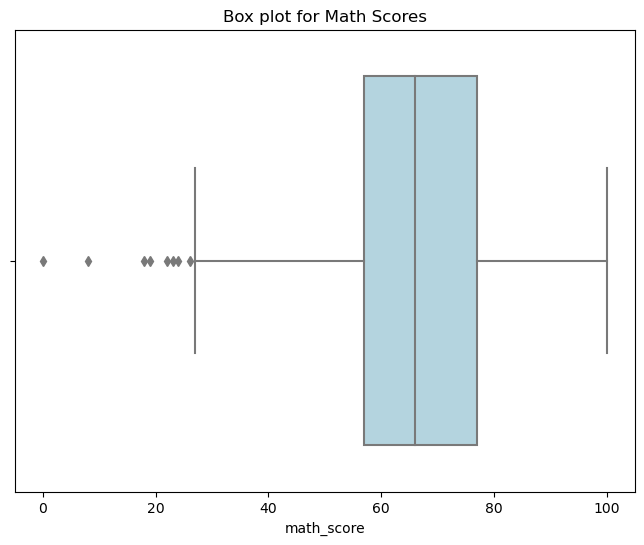

In [43]:
#question-27. Box plot for math scores to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='math_score', color='lightblue')
plt.title('Box plot for Math Scores')
plt.show()

In [44]:
#question-28. Number of students in each race/ethnicity group
students_by_race = df['race_ethnicity'].value_counts()
print("Number of students in each race/ethnicity group:")
print(students_by_race)

Number of students in each race/ethnicity group:
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


In [45]:
#question-29. Top 3 parental education levels with the highest average total scores
top_3_education_levels = df.groupby('parental_level_of_education')['total_score'].mean().nlargest(3)
print("Top 3 parental education levels with the highest average total scores:")
print(top_3_education_levels)

Top 3 parental education levels with the highest average total scores:
parental_level_of_education
master's degree       145.118644
bachelor's degree     142.389831
associate's degree    138.810811
Name: total_score, dtype: float64


In [46]:
#question-30. Number of students who scored the same in all three subjects
students_same_in_all = df[(df['math_score'] == df['reading_score']) & (df['reading_score'] == df['writing_score'])].shape[0]
print(f"Number of students who scored the same in all three subjects: {students_same_in_all}")

Number of students who scored the same in all three subjects: 5


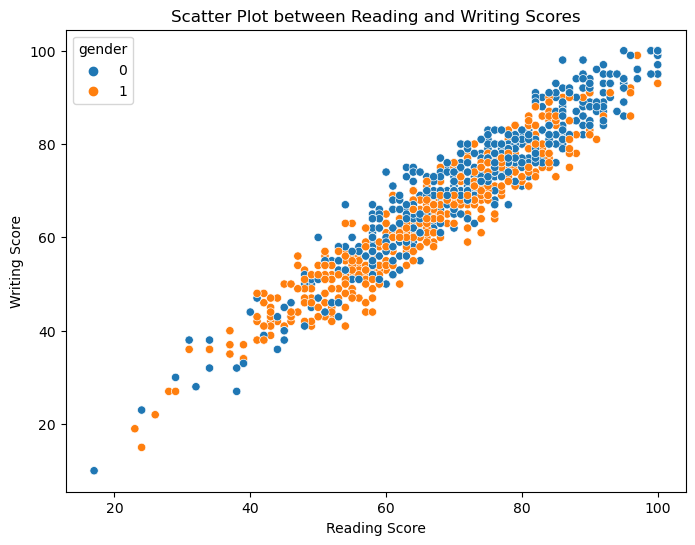

In [47]:
#question-31. Scatter plot between reading and writing scores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='reading_score', y='writing_score', hue='gender')
plt.title('Scatter Plot between Reading and Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

In [48]:
#question-32. Average reading score for students from each parental education level
avg_reading_score_by_education = df.groupby('parental_level_of_education')['reading_score'].mean()
print("Average reading score by parental education level:")
print(avg_reading_score_by_education)

Average reading score by parental education level:
parental_level_of_education
associate's degree    70.927928
bachelor's degree     73.000000
high school           64.704082
master's degree       75.372881
some college          69.460177
some high school      66.938547
Name: reading_score, dtype: float64


In [49]:
#question-33. Number of students with an average score between 70 and 80
students_70_80_avg = df[(df['average_score'] >= 70) & (df['average_score'] <= 80)].shape[0]
print(f"Number of students with an average score between 70 and 80: {students_70_80_avg}")

Number of students with an average score between 70 and 80: 265


In [50]:
#question-34. Most common score range for math scores (e.g., 60-70, 70-80)
score_bins = pd.cut(df['math_score'], bins=[0, 60, 70, 80, 90, 100])
most_common_bin = score_bins.value_counts().idxmax()
print(f"Most common score range for math scores: {most_common_bin}")

Most common score range for math scores: (0, 60]


In [53]:
from scipy.stats import skew

In [54]:
#question-35. Skewness of the reading scores
reading_score_skewness = skew(df['reading_score'])
print(f"Skewness of reading scores: {reading_score_skewness}")

Skewness of reading scores: -0.25871569927829347


C:\Users\Admin\AppData\Local\Temp\ipykernel_1644\1762138041.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['average_score'], shade=True, color='blue')


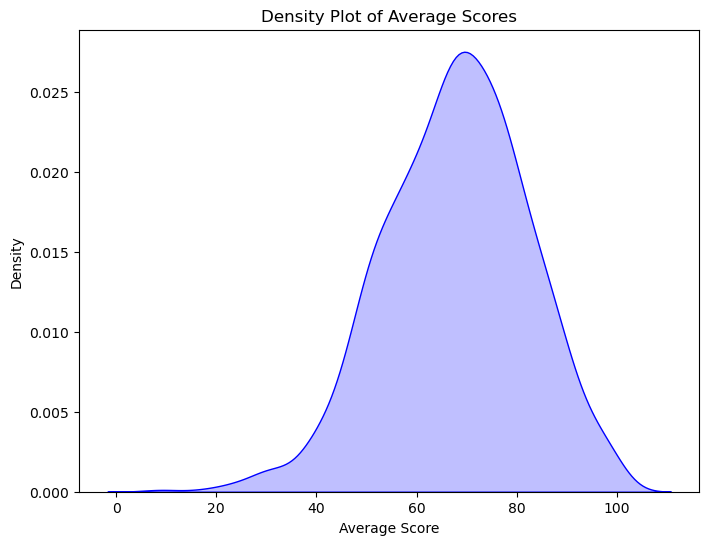

In [55]:
#question-36. Density plot of average scores
plt.figure(figsize=(8, 6))
sns.kdeplot(df['average_score'], shade=True, color='blue')
plt.title('Density Plot of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Density')
plt.show()

In [56]:
#question-37. Maximum average score for each gender
max_avg_score_by_gender = df.groupby('gender')['average_score'].max()
print("Maximum average score for each gender:")
print(max_avg_score_by_gender)

Maximum average score for each gender:
gender
0    100.0
1    100.0
Name: average_score, dtype: float64


In [61]:
#question-38. Interquartile range (IQR) of math scores
math_score_iqr = df['math_score'].quantile(0.75)-df['math_score'].quantile(0.25)
print(f"Interquartile range (IQR) of math scores: {math_score_iqr}")

Interquartile range (IQR) of math scores: 20.0


In [59]:
#question-39. Students who scored a perfect score (100) in any subject
perfect_scores = df[(df['math_score'] == 100) | (df['reading_score'] == 100) | (df['writing_score'] == 100)]
print("Students who scored a perfect score (100) in any subject:")
print(perfect_scores)

Students who scored a perfect score (100) in any subject:
     gender race_ethnicity parental_level_of_education  lunch  \
106       0        group D             master's degree      1   
114       0        group E           bachelor's degree      1   
149       1        group E          associate's degree      0   
165       0        group C           bachelor's degree      1   
179       0        group D            some high school      1   
377       0        group D             master's degree      0   
381       1        group C          associate's degree      1   
403       0        group D                 high school      1   
451       0        group E                some college      1   
458       0        group E           bachelor's degree      1   
546       0        group A            some high school      1   
566       0        group E           bachelor's degree      0   
594       0        group C           bachelor's degree      1   
623       1        group A      

In [60]:
#question-40. Compare the average writing score of students who took and didn't take the test preparation course
avg_writing_score_by_test_prep = df.groupby('test_preparation_course')['writing_score'].mean()
print("Average writing score by test preparation course completion:")
print(avg_writing_score_by_test_prep)

Average writing score by test preparation course completion:
test_preparation_course
0    64.504673
1    74.418994
Name: writing_score, dtype: float64
